### Set data Path

In [ ]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
!ls /tmp/data/flight-data/csv

In [ ]:
flightData2015 = '/tmp/data/flight-data/csv/2015-summary.csv'
retailDataDay = '/tmp/retail-data/by-day/'
retailDataDaySmall = '/tmp/retail-data/by-day/2010-12-02.csv'

In [ ]:
!ls '/tmp/retail-data/by-day/2010-12-02.csv'

## What is Apache Spark?

-  Unified computing engine for parallel data processing distributed across clusters (machine nodes)   
<br>
    -  Structured APIs:
        -  Datasets
        -  DataFrames
        -  SQL   
        <br>
    -  Unstructured APIs:
        -  RDDs   
        <br>
    -  Libraries:
        -  Structured Streaming
        -  Machine Learning
        -  Graph   
        <br>
    -  Language APIs:
        -  Scala
        -  Java
        -  Python
        -  SQL
        -  R

## Introduction to Spark

-  Spark Applications:
    -  Driver (heart of Spark Application during application's lifecycle):
        -  maintains information about Spark Application
        -  responds to user's program / input
        -  distributes and schedules work across executors   
        <br>
    -  Executors:
        -  executes work (code) assigned by driver
        -  reports state of work execution back to driver node   
        <br>
    -  SparkSession:
        -  entry point that manages Spark Application via driver process   
        <br>
    -  DataFrames:
        -  represents a table of data with rows and columns
        -  compiled in a schema that defines the column labels and data types   
        <br>
    -  Partitions:
        -  chunks of data distributed across cluster for parallel execution
        -  in addition, a collection of rows sitting on one physical machine in cluster
        -  parallelism = partitions = executors (x: 1 partition / 1,000 executors = parallelism of 1; 1,000 paritions / 1 executors = parallelism of 1)   
        <br>
    -  Lazy Evaluation:
        -  bundles plan of transformations on source data into DAG then triggers DAG on action
        -  molds a logical plan into a pysical plan that will run across cluster   
        <br>
    -  Transformations:
         -  data manipulations and modifications   
            <br>
             -  Narrow Transformations (1 to 1):
                 -  each input partition will contribute to only one output partition
                 -  no dependencies => 1 parent w/ 1 child
                 -  ex: filter, maps   
                <br>
             -  Wide Transformations (1 to N):
                  -  "aka" shuffle
                  -  many dependencies => 1 parent w/ many children
                  -  each input partition will contribute to many output partitions across the cluster
                  -  when a shuffle occurs Spark writes the results to disk ex: spark.sql.shuffle.partitions
                  -  ex: aggregations, joins, groupings   
       <br>           
    -  Actions:
        -  triggers the series of transformations into a spark job
            -  types:
                -  view data in the console
                -  collect data
                -  write to output data sources

   -  Spark Job (represents set of transformations triggered by an individual action)
   -  Schema Inference (have Spark best guess the schema of data) ***triggers Spark Job when scanning through data***
   -  Spark-Submit (launches application code to a cluster)
   -  Catalyst (planning and processing of work engine)

### Note: Spark contains separate Python and R processes hence when using Spark from Python or R language API the Python or R code is transaled into code that Spark can run on the executor JVMs

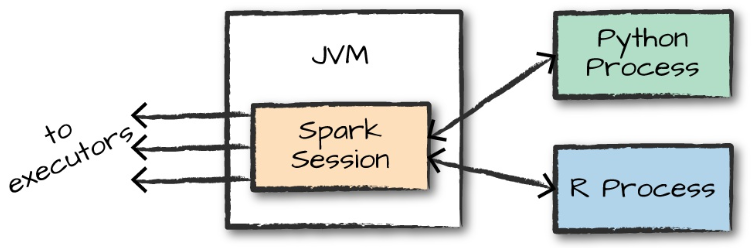

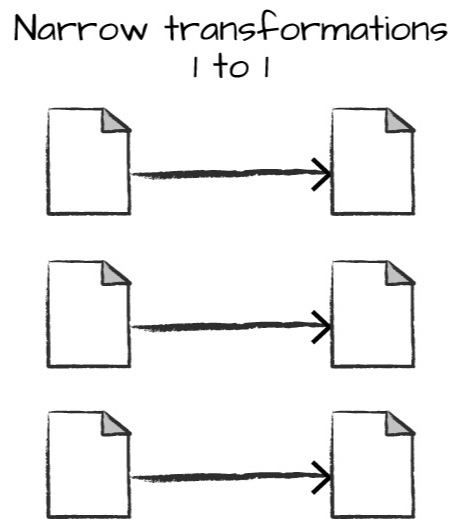

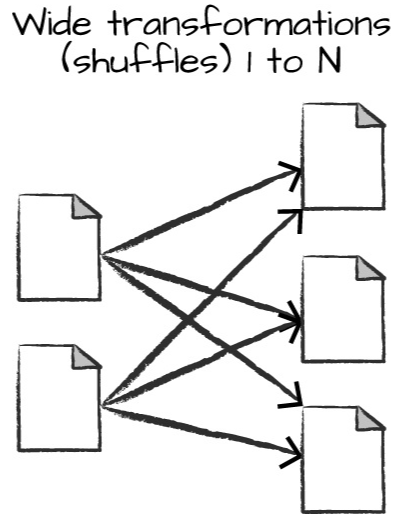

### Practicals

In [ ]:
flightData2015

In [ ]:
flightDataDF2015 = spark\
.read\
.option("inferSchema", "true")\
.option("header", "true")\
.csv(flightData2015)

In [ ]:
flightDataDF2015 = flightDataDF2015.repartition(20, "DEST_COUNTRY_NAME")

In [ ]:
print(flightDataDF2015)

In [ ]:
flightDataDF2015.printSchema()

In [ ]:
flightDataDF2015.rdd.getNumPartitions()

In [ ]:
flightDataDF2015.show(5)

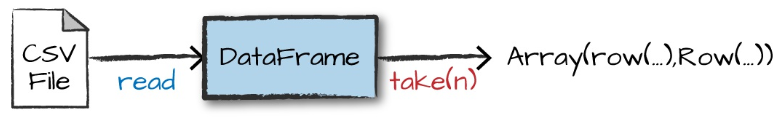

-  **Explain Plan**:
    -  displays DFs lineage

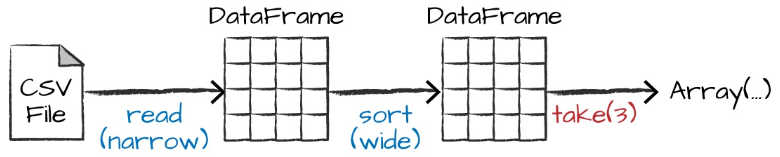

-  **SPARK.SQL.SHUFFLE.PARTITIONS**:
    -  by default, there are 200 shuffle partitions

In [ ]:
spark.conf.set("spark.sql.shuffle.partitions", "5")

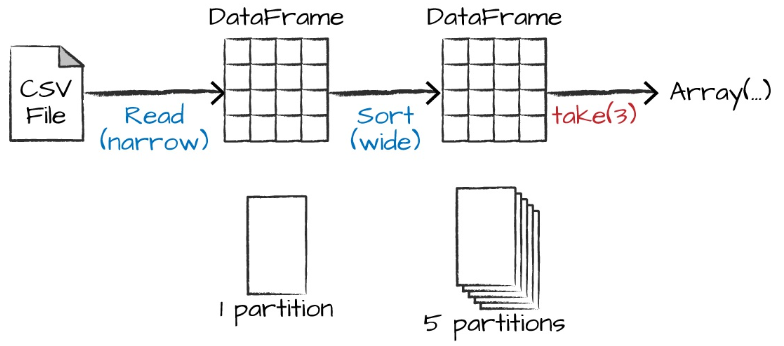

In [ ]:
flightDataDF2015.sort("count", ascending=False).show()

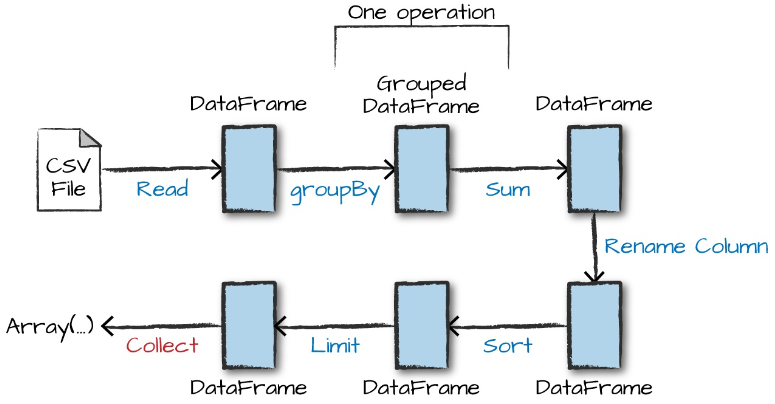

In [ ]:
flightDataDF2015\
.groupBy("dest_country_name")\
.sum("count")\
.withColumnRenamed("sum(count)", "destination_total")\
.sort(desc("destination_total"))\
.limit(3)\
.show()

In [ ]:
flightDataDF2015.schema

In [ ]:
print(retailDataDaySmall)

In [ ]:
staticDataFrame = spark\
.read\
.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load(retailDataDaySmall)

In [ ]:
staticDataFrame.show()